In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df=pd.read_csv("weight_data.csv")
df.head()


,Calorie_intake,Exercise_Hours/Week,Age,Weight
0,2500,3,30,70
1,2000,2,25,65
2,3000,4,35,80
3,1800,1,22,60
4,2800,3,28,75


In [3]:
X = df[['Calorie_intake','Exercise_Hours/Week', 'Age']].values
Y = df['Weight'].values

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [6]:
def regression(X, Y, learning_rate, epochs):
    n_samples, m = X.shape
    theta = np.zeros((m))
    cost_list = []

    for i in range(epochs):
        y_pred = np.dot(X, theta)
        cost = (1 / (2 * n_samples)) * np.sum(np.square( y_pred - Y))
        cost_list.append(cost)

        gradient = (1 / n_samples) * np.dot(X.T,( y_pred - Y))
        theta -= learning_rate * gradient

    return theta, cost_list

In [7]:
theta, cost_list = regression(X_train, Y_train, learning_rate=0.0000001, epochs=1000)

y_pred_test = np.dot(X_test, theta)

In [8]:
#evaluating the metrics
mse = np.mean((Y_test - y_pred_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y_test - y_pred_test))
total_variance = np.sum((Y_test - np.mean(Y_test))**2)
r2 = 1 - (mse / total_variance)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 46.24660316440958
Root Mean Squared Error (RMSE): 6.8004855094625105
Mean Absolute Error (MAE): 5.511455244966308
R-squared (R2): 0.8658546681235401


In [18]:
data = pd.DataFrame().assign(
    Actual=Y_test,
    Predicted=y_pred_test,
    Difference=Y_test - y_pred_test
)
print(data)

   Actual  Predicted  Difference
0      70  72.121984   -2.121984
1      88  89.437472   -1.437472
2      66  54.814600   11.185400
3      65  57.699035    7.300965


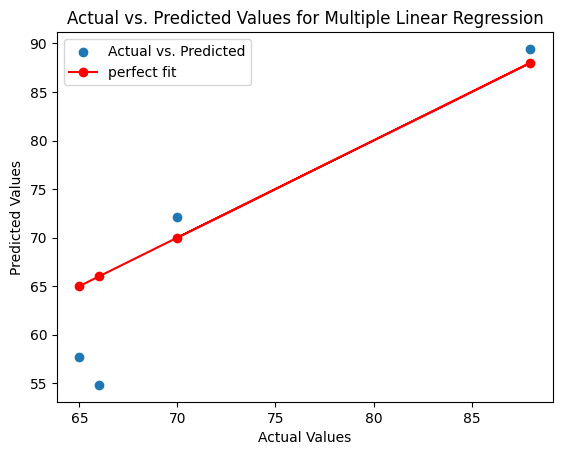

In [20]:
import matplotlib.pyplot as plt
plt.scatter(data['Actual'], data['Predicted'], label='Actual vs. Predicted', marker='o')
plt.plot(data['Actual'], data['Actual'], marker='o', linestyle='-', color='red', label='perfect fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Multiple Linear Regression')
plt.legend()
plt.show()